<a href="https://colab.research.google.com/github/uoahy-6uoas/Data-Structure/blob/ch2-edit/ds2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>재귀와 귀납적 사고</h1>**

**1. 자료구조와 재귀**
>**재귀**는 내 안의 나를 찾는 것
ex) 팩토리얼, 점화식

**2. 재귀 구조의 예**

* 등차수열 : $a_n = a_{n-1} + 3, a_1 = 1$

In [1]:
#등차수열
def seq(n):
  if n==1:
    return 1
  else:
    return seq(n-1) + 3

* 피보나치 수열(재귀버전) : $f_n = f_{n-1} + f_{n-2}, f_1=f_2=1$

In [2]:
#피보나치 수열 재귀ver.
def fib(n):
  if n==1 or n==2:
    return 1
  else:
    return fib(n-1) + fib(n-2)

In [3]:
#피보나치 수열 비재귀ver.
f = []
def fib_fast(n):
  f[1] = 1
  f[2] = 1
  for i in range(3,n+1):
    f[i] = f[i-1] + f[i-2]
    return f[n]

* 하노이탑<br>
> *term*
>* 원반은 한 번에 하나씩 옮길 수 있다.
>* 큰 원반이 작은 원반 아래에 놓여야 한다.
>* 최종적으로 a 기둥의 원반 모양 그대로 b 기둥으로 옮겨야함

```
#pseudocode
move(n,a,b,c) -> 원반 옮기기:
  if n > 0:
    move(n-1,a,c,b) #a에 있는 n-1개의 원반을 c로 옮긴다.
    a에 있는 남아있는 가장 큰 원반을 b로 옮긴다.
    move(n-1,c,b,a) #c에 있는 n-1개의 원반을 b로 옮긴다.
```
총 move함수가 $2^n-1$번 호출된다..

* 선택 정렬
> 1. 리스트를 쭉 훑어 가장 큰 값을 제일 오른쪽 값과 바꾼다.<br>
> 2. 반복하면 ASC 정렬완료

In [4]:
#선택 정렬 len(A)==n
def selectionSort(A,n): #type(A) == list
  for i in range(n-1,0,-1):
    k = A.index(max(A[:i])) #최댓값의 인덱스를 k에 넣자
    A[k], A[-1] = A[-1], A[k] #swap

In [5]:
#선택 정렬(재귀 버전) len(A)==n
def selectionSort_recursion_ver(A,n): # 가장 큰 값 오른쪽으로 보냄
  if n > 1:
    k = A.index(max(A))
    A[k], A[n-1] = A[n-1], A[k]
    selectionSort_recursion_ver(A,n-1) #다음으로 큰 값 오른쪽으로 보냄

* 중위, 전위, 후위 표현법
> 중위표현법 : $(A+B)\times(C-2)$  {*일반적인 수식*}<br>
> 전위표현법 : $\times+AB-C2$  {*피연산자 앞의 연산자 순서대로*} <br>
> 후위표현법 : $AB+C2-\times$ {*피연산자 뒤에 연산자*}

```
<infix> = <variable> | <infix> <operater> <infix>
<operater> =  + | - | * | /

<prefix> = <variable> | <operater><prefix><prefix>
<operater> =  + | - | * | /

<postfix> = <variable> | <postfix><postfix><operater>
<operater> =  + | - | * | /
```



* 깊이 우선 탐색 (Depth-Fist Search) <br>
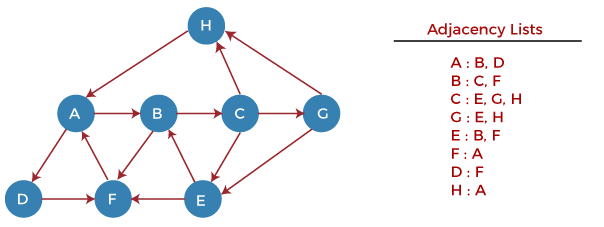 <br>
https://www.javatpoint.com/depth-first-search-algorithm

In [6]:
#깊이 우선 탐색
def DFS(A):
  A.visited = True
  for y in A: #x에 연결된 모든 노드(y) 각각에 대하여
    if y.visited == False: DFS(y)

**3. 재귀와 수학적 귀납법**
> 수학적 귀납법은 자신보다 작은 문제의 답이 옳다고 가정하고 관계를 통해 자신의 결론이 참임을 보이는 방법

재귀 알고리즘은 명시적|암묵적으로 다음 세가지 구성요소를 갖추어야함
1. 경계조건 : 재귀 호풀이 반복되다가 궁극적으로 끝나는 조건
2. 재귀호출
3. 관계 : 닳음꼴 작은 문제와 본 문제의 관계를 나타나는 부분


* 연습문제
1. 다음 수열의 n번째 항을 구하는 재귀 알고리즘을 작성하시오<br>
$a_n = 5a_{n-1}+3 , a_1=0$

In [7]:
def exam1(n):
  if n == 1:
    return 0
  else:
    return 5*exam1(n-1)

2. 다음 알고리즘에서 양의 정수 n에 대해 함수 seq()는 총 몇 회 호출되는가?

In [8]:
def seq(n):
  if n==1:
    return 1
  else:
    return seq(n-1)+3

```
T(1) = 1 임이 자명
T(n) = n 이라고 가정
T(n+1) = 1+T(n) = 1+n 이므로
T(n) = n, n회 호출된다.
```




3. fib(5)를 수행하면 fib()는 총 몇 회 호출되는가?

In [9]:
def fib(n):
  if n==1 or n==2:
    return 1
  else:
    return fib(n-1)+fib(n-2)

```
T(1), T(2) = 1, 1
T(3) = T(1)+T(2) = 2
T(4) = T(3)+T(2) = 2+1 =3
T(5) = T(4)+T(3) = 3+2 = 5
#본인 호출은 제외함
```

4. move(5,a,b,c)를 수행하면 move()는 몇회 호출되는가?
```
move(n,a,b,c):
  if n > 0:
    move(n-1,a,c,b)
    a에 있는 남아있는 가장 큰 원반을 b로 옮긴다.
    move(n-1,c,b,a)
```

$T(1)=2$<br>
$T(n) = 2^n$ 라고 하자<br>
$T(n+1) = T(n)\times2 = 2\times2^n = 2^{n+1}$<br>
수학적 귀납법에 따라 증명


5. 4번 문제에서 원반을 옮기는 행위의 총 횟수를 세어보자

$T(1)=1$<br>
$T(n) = 2^n-1$ 라고 하자<br>
$T(n+1) = 2\times T(n)+1 = 2\times(2^n-1)+1 = 2^{n+1}-1$<br>
수학적 귀납법에 따라 증명

6. 4번 문제에서 경계조건(if문)이 빠지면 어떻게 되나?<br>
n이 끝없이 감소하여 move함수가 계속 호출된다.

7. 선택 정렬 알고리즘에서 양의 정수 n에 대해 selectionSort_recursion_ver(A,n)을 수행하면 함수는 총 몇 회 수행되는가?

In [10]:
def selectionSort_recursion_ver(A,n):
  if n > 1:
    k = A.index(max(A))
    A[k], A[n-1] = A[n-1], A[k]
    selectionSort_recursion_ver(A,n-1)

```
T(1) = 1
T(n) = n 이라고 하자
T(n+1) = T(n)+1 = n+1 따라서 증명
```

8. 다음 재귀적 표현에서 <T>가 표현한 것은?
```
<T> = <number> | <T><number>
<number> = 0|1|2|...|9
```
정수를 표현함

ch2 fin.